In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)
%matplotlib inline

#### Loading Companies.csv

In [2]:
companies_df = pd.read_csv('companies.csv',encoding="ISO-8859-1") 
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
funding_rounds_df = pd.read_csv('rounds2.csv',encoding="ISO-8859-1") 
funding_rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


From the head of 2 data frames, we can see that the common column(permalink) are not having a standerd format
So changing both the variables into lower cases

In [4]:
companies_df['permalink'] = companies_df['permalink'].str.lower()
funding_rounds_df['company_permalink'] = funding_rounds_df['company_permalink'].str.lower()

### Checking the shape of both dataframes and describing them

In [5]:
print ("The shape of companies dataframe is: ",companies_df.shape)
companies_df.describe(include = 'all')

The shape of companies dataframe is:  (66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/androbiosys,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
print ("The shape of funding_rounds_df dataframe is: ",funding_rounds_df.shape)
funding_rounds_df.describe(include = 'all')

The shape of funding_rounds_df dataframe is:  (114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,66370,114949,14,8,5033,NaN
top,/organization/solarflare,/funding-round/85960cacff56dfdf3b3ff3c2cb071a30,venture,A,01-01-2014,NaN
freq,19,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


From the above desciptions of both the dataframes, we can see that companies_df is having 66368 unique companies whereas 
rounds dataframe is having 66370 unique companies
ie: ``` rounds2.csv is having 2 more extra companies than companies.csv```

By checking the shape and unqiue count of companies dataframe, ```permalink``` should be the unique column for each company

In [7]:
### checking the details of the extra two companies in funding_rounds dataframe
funding_rounds_df[~(funding_rounds_df.company_permalink.isin(companies_df.permalink))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [8]:
## removing ambiguous char and setting a standerd encoding for both the dataset
## changing companies_df except founded at
companies_df[companies_df.columns[:-1]] = companies_df[companies_df.columns[:-1]].apply(lambda x: x.str.encode('UTF-8').str.decode('ascii','ignore').str.lower())
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010


In [9]:
## changing all columns except dunded and raised amount
funding_rounds_df[funding_rounds_df.columns[:4]] = funding_rounds_df[funding_rounds_df.columns[:4]].apply(lambda x: x.str.encode('UTF-8').str.decode('ascii','ignore').str.lower())
funding_rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0


### Checking the number of unique companies in both the dataset

In [10]:
print ("Number of unique companies in rounds2 dataframe = ",funding_rounds_df.company_permalink.nunique())
print ("Number of unique companies in companies dataframe = ",companies_df.permalink.nunique())

Number of unique companies in rounds2 dataframe =  66368
Number of unique companies in companies dataframe =  66368


In [11]:
### checking if any unknown companies are in round dataframe
funding_rounds_df[~(funding_rounds_df.company_permalink.isin(companies_df.permalink))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


Every company present in rounds2 csv are present in companies.csv.<br>ie:No companies are missing.<br>Because of this one-to-one mapping between these two dataframes are now possible

## Creating Master Dataframe

In [12]:
master_frame = companies_df.merge(
    funding_rounds_df.rename({'company_permalink':'permalink'},axis=1),how='inner',on='permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0


In [13]:
master_frame.shape

(114949, 15)

In [14]:
master_frame.describe(include = 'all')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114948,108815,111539,114949,106271,104003,104782,104785,94428,114949,114949,31140,114949,9.495900e+04
unique,66368,66034,61187,27296,4,137,311,1092,5111,3978,114949,14,8,5033,NaN
top,/organization/solarflare,solarflare communications,http://www.solarflare.com,biotechnology,operating,usa,ca,sf bay area,san francisco,01-01-2012,/funding-round/85960cacff56dfdf3b3ff3c2cb071a30,venture,a,01-01-2014,NaN
freq,19,19,19,8165,90153,72308,26664,19078,7422,4642,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [15]:
## Percentage of null values in each columns
100.*master_frame.isnull().sum()/master_frame.shape[0]

permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

`raised amount` is the column which we need to analyse further
We can see that the raised amount is having ~17.4% values empty. And from the description table we can see that the sprectrum spread of this column is huge. Because of this imputing this variable with known values is not good. Therefore, droping the rows which has raised amount as null. Similarly dropping rows which contains country_code and  category_list as null
Also dropping 'funding_round_code','homepage_url','founded_at'

In [16]:
master_frame = master_frame.drop(['funding_round_code','homepage_url','founded_at'],axis=1).dropna(subset=['raised_amount_usd','country_code','category_list'])
master_frame.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:qounter,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,curated web,operating,chn,22,beijing,beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01games technology,games,operating,hkg,NaN,hong kong,hong kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [17]:
## Percentage of null values in each columns
100.*master_frame.isnull().sum()/master_frame.shape[0]

permalink                  0.000000
name                       0.001130
category_list              0.000000
status                     0.000000
country_code               0.000000
state_code                 1.955291
region                     1.337415
city                       1.334026
funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
dtype: float64

In [18]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

Since we are intereseted in venture,angel,seed and private_equity, we can drop all other rows 

In [19]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'private_equity') | (master_frame['funding_round_type'] == 'seed') | (master_frame['funding_round_type'] == 'angel')]
master_frame.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:qounter,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,curated web,operating,chn,22,beijing,beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


In [20]:
master_frame.sample(5)

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
92315,/organization/solfocus,solfocus,clean technology|solar,closed,usa,ca,sf bay area,san jose,/funding-round/84a60852f2d82494380fc3010d419816,venture,23-04-2010,3000000.0
59070,/organization/marc-spring,marc & spring,beauty|consumer goods|internet,operating,usa,ny,new york city,new york,/funding-round/951467f8717a6d25a09079adfb36207b,venture,17-06-2015,1000000.0
98116,/organization/taulia,taulia,enterprise software|hardware + software|saas,operating,usa,ca,sf bay area,san francisco,/funding-round/e759884519b2dbba64db09267482f04f,venture,21-01-2015,15000000.0
50758,/organization/jack-erwin,jack erwin,e-commerce|fashion,operating,usa,ny,new york city,new york,/funding-round/954cd798a88b248de64c73d6bccc3fec,venture,18-09-2014,9000000.0
69533,/organization/objective-logistics,objective logistics,analytics|big data|software,acquired,usa,ma,boston,boston,/funding-round/078fad2c50cb181d718e8ad6d663f934,venture,30-11-2011,1500000.0


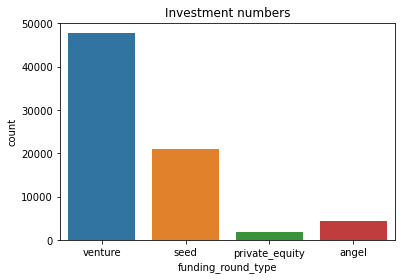

In [21]:
#The number of investment in each funding_round_type 
sns.countplot(x='funding_round_type',data=master_frame)
plt.title("Investment numbers")
plt.show()

In [22]:
# Converting raised_amount_usd to million dollers
master_frame['raised_amount_usd'] = round(master_frame['raised_amount_usd']/1000000,5)

In [23]:
%matplotlib inline

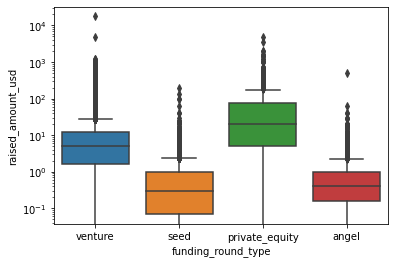

In [24]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

In [25]:
master_frame.groupby(['funding_round_type']).agg({'raised_amount_usd':['count','mean','median']})

raised_amount_usd                      
                               count       mean     median
funding_round_type                                        
angel                           4400   0.971574   0.414905
private_equity                  1820  73.938486  20.000000
seed                           21095   0.747794   0.300000
venture                        47809  11.724223   5.000000

In [26]:
def annotate_graph(ax,xytext=(0, 10)):
    for p in ax.patches:
                 ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=15, color='black', xytext=xytext,
                     textcoords='offset points')

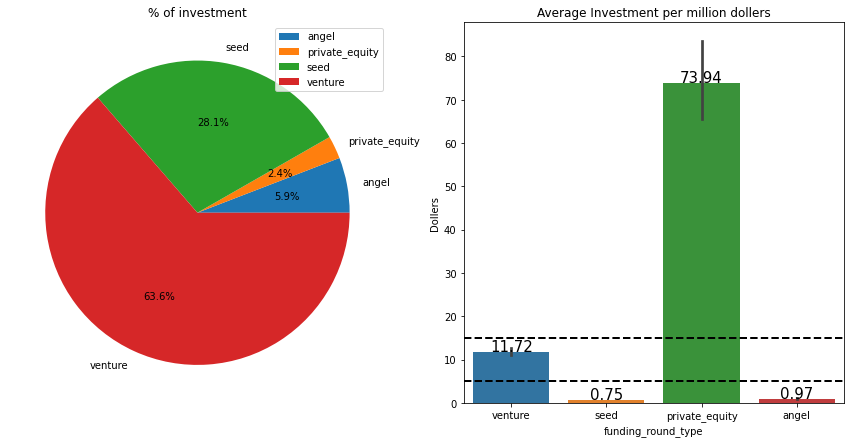

In [27]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
master_frame.groupby('funding_round_type').agg({'permalink':'count'}).plot.pie(y= 'permalink',ax=ax1, autopct='%1.1f%%'
                                                                               ,shadow=False,use_index=False)
plt.title("% of investment")
plt.ylabel("")
plt.subplot(122)
ax = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame,estimator=np.mean)
annotate_graph(ax,xytext=(0,5))
plt.axhline(y=5, linewidth=2, color = 'k',ls = '--')
plt.axhline(y=15, linewidth=2, color = 'k',ls = '--')
plt.title("Average Investment per million dollers")
plt.ylabel("Dollers")
plt.show()

## So from the above analysis we can say that, if spark funds wants to invest between 5 to 15 million USD per investment round, then they can opt for ```Venture Type```

# Country Analysis

The next is to analyse the `top 9 countries` which have `venture` as investment type

In [28]:
top_9 = master_frame[(master_frame.funding_round_type == 'venture')].groupby('country_code').agg({'raised_amount_usd':'sum'})\
.sort_values('raised_amount_usd',ascending=False)[:9]
top_9

,raised_amount_usd
country_code,
usa,420068.02999
chn,39338.91872
gbr,20072.81306
ind,14261.50872
can,9482.21766
fra,7226.85136
isr,6854.35048
deu,6306.92199
jpn,3167.64710


In [29]:
list(top_9.index)

['usa', 'chn', 'gbr', 'ind', 'can', 'fra', 'isr', 'deu', 'jpn']

In [30]:
top9_df = master_frame[(master_frame.funding_round_type == 'venture')&
                      (master_frame.country_code.isin(list(top_9.index)))]

top9_df.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00000
4,/organization/0-6-com,0-6.com,curated web,operating,chn,22,beijing,beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00000
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.71949
10,/organization/0xdata,h2o.ai,analytics,operating,usa,ca,sf bay area,mountain view,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.00000
11,/organization/0xdata,h2o.ai,analytics,operating,usa,ca,sf bay area,mountain view,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.70000


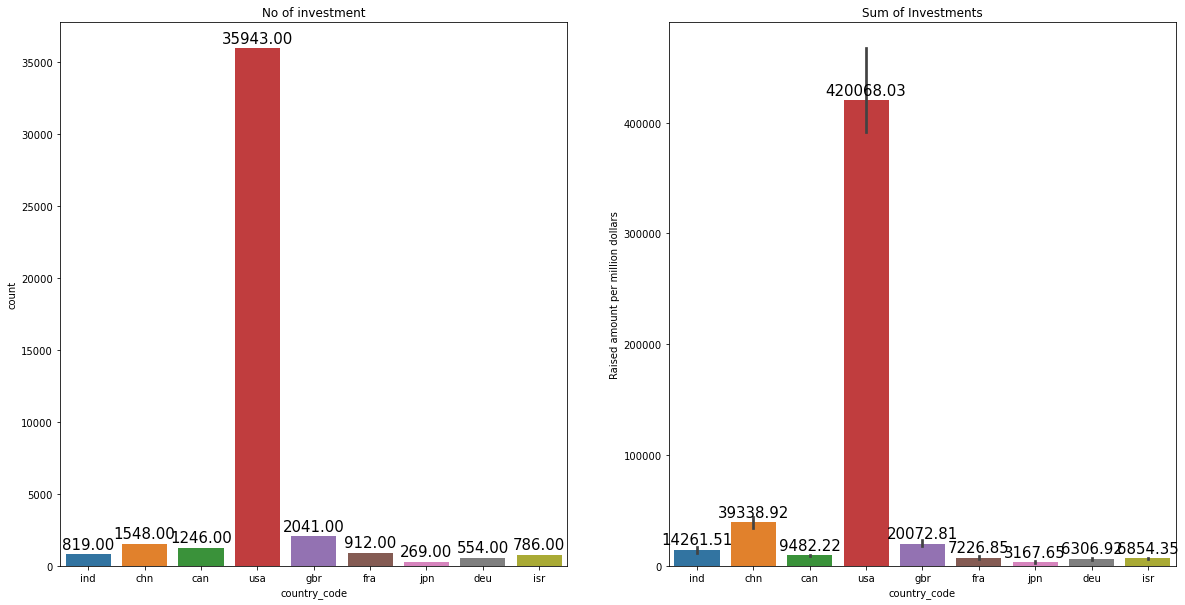

In [31]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
ax = sns.countplot(x="country_code", data=top9_df)
annotate_graph(ax,(0,10))
plt.title("No of investment")
plt.subplot(1, 2, 2)
ax = sns.barplot(x="country_code", y="raised_amount_usd", data=top9_df, estimator=sum)
annotate_graph(ax,(0,10))
plt.ylabel("Raised amount per million dollars")
plt.title("Sum of Investments")
plt.show()

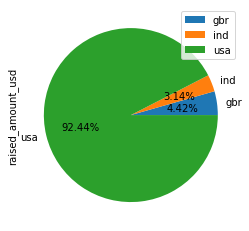

In [32]:
# Investment ratios for top 3 english speaking countries
top9_df[top9_df.country_code.isin(['ind','usa','gbr'])].groupby('country_code').agg({'raised_amount_usd':'sum'}).plot.pie(y= 'raised_amount_usd', autopct='%1.2f%%'
                                                                               ,shadow=False,use_index=False)

The above raised amount are in the format of per million<br>.
We can see the top raised amount countires are USA,GBR and Chn.
From the <a>https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language</a>, we can see that top english speaking countries are 
<b><i>```India(IND),USA(USA) and UK(GBR)```</i></b>

# Sector Analysis

In [33]:
# read mapping file
mapping = pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [34]:
mapping.sample(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
365,Information Security,0,0,0,0,0,0,0,0,1
566,Rental Housing,0,0,0,0,0,0,0,1,0
374,Intelligent Systems,0,0,0,0,0,0,0,1,0
25,Animal Feed,0,0,0,0,1,0,0,0,0
580,Search,0,0,0,0,0,0,1,0,0


In [35]:
mapping['category_list'] = mapping['category_list'].str.lower()

In [36]:
mapping.category_list.nunique()

687

In [37]:
mapping.category_list.unique()

array([nan, '3d', '3d printing', '3d technology', 'accounting',
       'active lifestyle', 'ad targeting', 'advanced materials',
       'adventure travel', 'advertising', 'advertising exchanges',
       'advertising networks', 'advertising platforms', 'advice',
       'aerospace', 'agriculture', 'air pollution control', 'algorithms',
       'all markets', 'all students', 'alter0tive medicine', 'alumni',
       'a0lytics', 'android', 'angels', 'animal feed',
       'anything capital intensive', 'app discovery', 'app marketing',
       'app stores', 'application performance monitoring',
       'application platforms', 'apps', 'aquaculture', 'architecture',
       'archiving', 'art', 'artificial intelligence', 'artists globally',
       'assisitive technology', 'assisted living', 'auctions', 'audio',
       'audiobooks', 'augmented reality', 'auto', 'automated kiosk',
       'automotive', 'b2b', 'b2b express delivery', 'babies',
       'baby accessories', 'baby boomers', 'baby safety', 'b

from the abive examples we can see some discrepancies in category list.<br>ex:0vigation - navigation,alter0tive medicine - alternative medicine. <b>In some of na places 0 are misplaced<b>

In [38]:
import re
mapping['category_list'] = mapping['category_list'].apply(lambda x: re.sub('0', 'na', str(x)))

mapping.category_list.unique()

array(['nan', '3d', '3d printing', '3d technology', 'accounting',
       'active lifestyle', 'ad targeting', 'advanced materials',
       'adventure travel', 'advertising', 'advertising exchanges',
       'advertising networks', 'advertising platforms', 'advice',
       'aerospace', 'agriculture', 'air pollution control', 'algorithms',
       'all markets', 'all students', 'alternative medicine', 'alumni',
       'analytics', 'android', 'angels', 'animal feed',
       'anything capital intensive', 'app discovery', 'app marketing',
       'app stores', 'application performance monitoring',
       'application platforms', 'apps', 'aquaculture', 'architecture',
       'archiving', 'art', 'artificial intelligence', 'artists globally',
       'assisitive technology', 'assisted living', 'auctions', 'audio',
       'audiobooks', 'augmented reality', 'auto', 'automated kiosk',
       'automotive', 'b2b', 'b2b express delivery', 'babies',
       'baby accessories', 'baby boomers', 'baby safety'

In [39]:
master_frame.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,ind,16,mumbai,mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00000
2,/organization/-qounter,:qounter,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70000
4,/organization/0-6-com,0-6.com,curated web,operating,chn,22,beijing,beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00000
7,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.04336
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,can,bc,vancouver,vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.71949


In [40]:
master_frame['category'] = master_frame['category_list'].str.split('|',expand=True)[0]
master_frame.sample(5)

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,category
49788,/organization/iosemantics,iosemantics,software,operating,usa,co,denver,conifer,/funding-round/6756a61085785df76341d8b25d47089b,venture,10-12-2011,0.31457,software
97270,/organization/tabula,tabula,semiconductors,operating,usa,ca,sf bay area,santa clara,/funding-round/f51b4c2aad47e7ff359991843ee84c0f,venture,28-03-2011,108.00000,semiconductors
83843,/organization/rhone-apparel,rhone apparel,e-commerce|online shopping|retail,operating,usa,ct,hartford,new canaan,/funding-round/8cf91b686743e4f4f49a87edd1f56eda,venture,21-09-2015,5.00000,e-commerce
45220,/organization/humble-bundle,humble bundle,digital media|games|nonprofits,operating,usa,ca,sf bay area,san francisco,/funding-round/f48e6a9de3b5812751c2d0fb5509e490,venture,21-04-2011,4.48000,digital media
74986,/organization/phloronol,phloronol,biotechnology,operating,usa,ca,sf bay area,san francisco,/funding-round/e57cc62bba22e54216cee62626dc8e68,venture,27-11-2010,8.16000,biotechnology


In [41]:
print(master_frame.category.nunique())
#master_frame.category.unique()

695


In [42]:
#mapping
print(mapping.category_list.nunique())

688


In [43]:
master_frame[~master_frame.category.isin(mapping.category_list.unique())].category.unique()

array(['cause marketing', 'english-speaking', 'toys', 'generation y-z',
       'enterprise hardware', 'social media advertising',
       'natural gas uses', 'internet technology', 'nightlife',
       'enterprise 2.0', 'adaptive equipment', 'skill gaming', 'racing',
       'specialty retail', 'registrars', 'internet tv',
       'biotechnology and semiconductor', 'vacation rentals',
       'rapidly expanding', 'kinect', 'product search', 'greentech',
       'retirement', 'subscription businesses', 'sponsorship',
       'deep information technology', 'golf equipment'], dtype=object)

In [44]:
mapping[~mapping.category_list.isin(master_frame.category.unique())].category_list.unique()

array(['nan', 'energy storage', 'enterprise 2.na', 'film distribution',
       'flowers', 'fmcg', 'lotteries', 'low bid auctions',
       'multi-level marketing', 'performance marketing',
       'pervasive computing', 'plumbers', 'renewable tech', 'smart grid',
       'social business', 'social recruiting', 'taxis', 'veterinary',
       'virtual workforces', 'women'], dtype=object)

In [45]:
mapping_melted = pd.melt(mapping,id_vars='category_list',var_name = 'main_category',value_name='value')
mapping_melted = mapping_melted[mapping_melted.value==1].iloc[:,:-1].rename({'category_list':'category'},axis=1)
mapping_melted['main_category'] = mapping_melted.main_category.str.lower()
mapping_melted.head()

,category,main_category
8,adventure travel,automotive & sports
14,aerospace,automotive & sports
45,auto,automotive & sports
46,automated kiosk,automotive & sports
47,automotive,automotive & sports


In [46]:
all_df = mapping_melted.merge(master_frame,how='inner',on='category')
print (all_df.shape)
all_df.head()

(75069, 14)


,category,main_category,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,adventure travel,automotive & sports,/organization/adventure-bucket-list,adventure bucket list,adventure travel|bridging online and offline|o...,operating,usa,ca,sf bay area,sunnyvale,/funding-round/380c8ef0b40918dc819458727b08f495,seed,01-03-2015,0.02500
1,adventure travel,automotive & sports,/organization/adventuredrop,adventuredrop,adventure travel|curated web|outdoors|travel,operating,usa,ca,sf bay area,san jose,/funding-round/ed29f832dcd3b336cf388810d2330cc1,seed,01-05-2008,0.10000
2,adventure travel,automotive & sports,/organization/boatsetter,boatsetter,adventure travel|boating industry|collaborativ...,operating,usa,fl,miami,miami,/funding-round/afd34e14043e8209fba6a8d07f5236f9,seed,13-03-2013,0.70000
3,adventure travel,automotive & sports,/organization/cookee,cookee,adventure travel|bicycles|online reservations,closed,chn,7,xiamen,xiamen,/funding-round/e43627ee331b3755b704e53a97330da4,seed,30-06-2015,0.01667
4,adventure travel,automotive & sports,/organization/elmysluotain,mykontiki (elmysluotain ltd),adventure travel|health and wellness|internet ...,operating,fin,13,helsinki,espoo,/funding-round/54189f167ded7c40d9cbc4637f60f1c5,seed,12-12-2012,0.03119


In [47]:
D3 = all_df.loc[((all_df.country_code == 'ind') & (all_df.funding_round_type == 'venture')
                & (all_df['raised_amount_usd'] >= 5.0) & (all_df['raised_amount_usd'] <= 15.)),:]
D1 = all_df.loc[((all_df.country_code == 'usa') & (all_df.funding_round_type == 'venture')
                & (all_df['raised_amount_usd'] >= 5.0) & (all_df['raised_amount_usd'] <= 15.)),:]
D2 = all_df.loc[((all_df.country_code == 'gbr') & (all_df.funding_round_type == 'venture')
                & (all_df['raised_amount_usd'] >= 5.0) & (all_df['raised_amount_usd'] <= 15.)),:]

print (D1.shape)
print (D2.shape)
print (D3.shape)

(12082, 14)
(622, 14)
(328, 14)


## Number of investment and amount of venture for top 3 countries in different sectors

In [48]:
#In India
D3.groupby('main_category').raised_amount_usd.agg(['count', 'sum']).sort_values('sum',ascending=False)

,count,sum
main_category,,
others,110,1013.40951
"social, finance, analytics, advertising",60,550.54955
"news, search and messaging",52,433.83455
entertainment,33,280.83000
manufacturing,21,200.90000
health,19,167.74000
cleantech / semiconductors,20,165.38000
automotive & sports,13,136.90000


In [49]:
#In USA
D1.groupby('main_category').raised_amount_usd.agg(['count', 'sum']).sort_values('sum',ascending=False)

,count,sum
main_category,,
others,2955,26356.00704
"social, finance, analytics, advertising",2717,23832.37695
cleantech / semiconductors,2354,21673.43086
"news, search and messaging",1586,13986.56742
health,911,8231.85946
manufacturing,801,7278.55337
entertainment,591,5099.19800
automotive & sports,167,1454.10437


In [50]:
#In UK
D2.groupby('main_category').raised_amount_usd.agg(['count', 'sum']).sort_values('sum',ascending=False)

,count,sum
main_category,,
others,148,1298.62433
cleantech / semiconductors,130,1163.99005
"social, finance, analytics, advertising",133,1089.40403
"news, search and messaging",73,615.74624
entertainment,56,482.78469
manufacturing,42,361.94035
health,24,214.53751
automotive & sports,16,167.05157


In [51]:
D3.head()

,category,main_category,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
98,aerospace,automotive & sports,/organization/mistral-solutions,mistral solutions,aerospace|defense|embedded hardware and softwa...,operating,ind,19,bangalore,bangalore,/funding-round/4688f3f8860d92330aa64f6f6aa0dd39,venture,06-02-2008,6.5
221,automotive,automotive & sports,/organization/ani-technologies,ola,automotive|e-commerce|internet|mobile|mobile c...,operating,ind,28,kolkata,kolkata,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5.0
238,automotive,automotive & sports,/organization/ather-energy,ather energy,automotive|electric vehicles,operating,ind,19,bangalore,bangalore,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,29-05-2015,12.0
305,automotive,automotive & sports,/organization/cardekho,cardekho,automotive|cars|online shopping,operating,ind,10,new delhi,gurgaon,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,27-11-2013,15.0
436,automotive,automotive & sports,/organization/incredible-technologies-pvt-ltd,incredible technologies (credr),automotive,operating,ind,16,mumbai,mumbai,/funding-round/6a4ce4ed8be26c7a2d0a24f4a92fd958,venture,11-09-2015,15.0


In [52]:
def get_sector_details(df):
    number_of_investment = df.permalink.count()
    sum_of_investment =  df.raised_amount_usd.sum()
    top_sector,second_sector,third_sector = df.main_category.value_counts().index[0:3]
    top_sector_investment = df[df.main_category == top_sector]['raised_amount_usd'].count()
    second_sector_investment = df[df.main_category == second_sector]['raised_amount_usd'].count()
    third_sector_investment = df[df.main_category == third_sector]['raised_amount_usd'].count()
    highest_inv_comp_top_sect = df[df.main_category == top_sector].groupby('name').agg({'raised_amount_usd':'sum'})\
                               .sort_values('raised_amount_usd',ascending=False).index[0]
    highest_inv_comp_top_sect = highest_inv_comp_top_sect
    highest_inv_comp_sec_sect = df[df.main_category == second_sector].groupby('name').agg({'raised_amount_usd':'sum'})\
                               .sort_values('raised_amount_usd',ascending=False).index[0]
    highest_inv_comp_sec_sect = highest_inv_comp_sec_sect
    return pd.Series([number_of_investment,sum_of_investment,top_sector,second_sector,third_sector,top_sector_investment,second_sector_investment,
                      third_sector_investment,highest_inv_comp_top_sect,highest_inv_comp_sec_sect],
                     index = ['1. Total number of investments (count)','2. Total amount of investment (USD)','3. Top sector (based on count of investments)',
                              '4. Second-best sector (based on count of investments)','5. Third-best sector (based on count of investments)',
                                 '6. Number of investments in the top sector (refer to point 3)','7. Number of investments in the second-best sector (refer to point 4)',
                              '8. Number of investments in the third-best sector (refer to point 5)',
                                '9. For the top sector count-wise (point 3), which company received the highest investment?',
                              '10. For the second-best sector count-wise (point 4), which company received the highest investment?'])

In [53]:
print (all_df[((all_df.country_code.isin(['ind','usa','gbr'])) & (all_df.funding_round_type == 'venture')
                & (all_df['raised_amount_usd'] >= 5.0) & (all_df['raised_amount_usd'] <= 15.))].groupby('country_code').apply(get_sector_details).T[['usa','gbr','ind']].to_csv())

,usa,gbr,ind
1. Total number of investments (count),12082,622,328
2. Total amount of investment (USD),107912.09747,5394.07877,2949.54361
3. Top sector (based on count of investments),others,others,others
4. Second-best sector (based on count of investments),"social, finance, analytics, advertising","social, finance, analytics, advertising","social, finance, analytics, advertising"
5. Third-best sector (based on count of investments),cleantech / semiconductors,cleantech / semiconductors,"news, search and messaging"
6. Number of investments in the top sector (refer to point 3),2955,148,110
7. Number of investments in the second-best sector (refer to point 4),2717,133,60
8. Number of investments in the third-best sector (refer to point 5),2354,130,52
"9. For the top sector count-wise (point 3), which company received the highest investment?",virtustream,electric cloud,firstcry.com
"10. For the second-best sector count-wise (point 4), which company received the highest investment?",sst inc

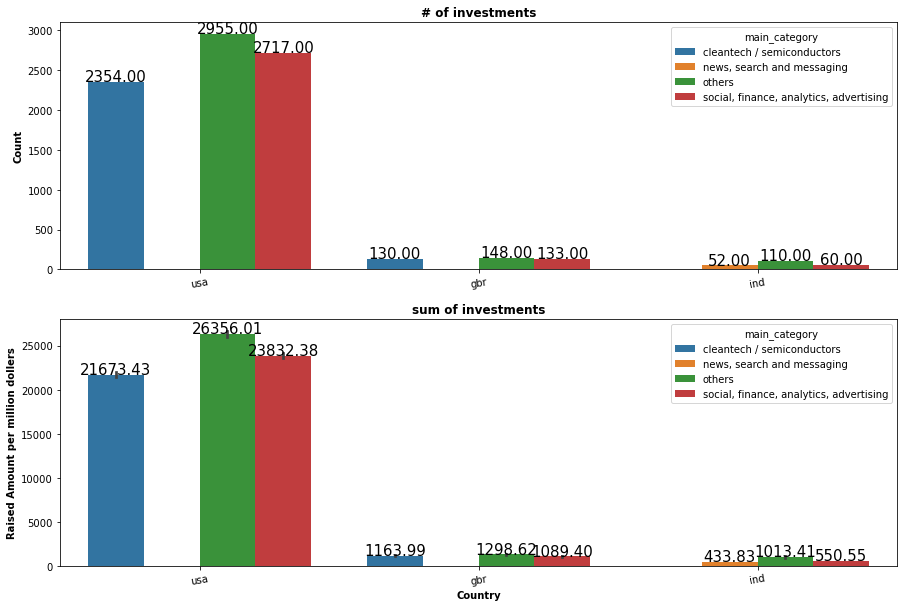

In [54]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
chart = sns.countplot(data = all_df[((all_df.funding_round_type == 'venture') 
                                     & (((all_df.country_code.isin(['usa','gbr']))&
 (all_df.main_category.isin(['others','social, finance, analytics, advertising','cleantech / semiconductors'])))|
((all_df.country_code.isin(['ind']))&
 (all_df.main_category.isin(['others','social, finance, analytics, advertising','news, search and messaging']))))
                                     & (all_df['raised_amount_usd'] >= 5.0) 
                                     & (all_df['raised_amount_usd'] <= 15.))
                                   ],x = 'country_code',hue='main_category')
annotate_graph(chart,(0,5))
#plt.yscale('log')
chart.set_xticklabels(chart.get_xticklabels(),rotation=10)
plt.ylabel("Count",fontweight='bold')
plt.xlabel("")
plt.title("# of investments",fontweight='bold')


plt.subplot(2,1,2)
chart = sns.barplot(data = all_df[((all_df.funding_round_type == 'venture') 
                                     & (((all_df.country_code.isin(['usa','gbr']))&
 (all_df.main_category.isin(['others','social, finance, analytics, advertising','cleantech / semiconductors'])))|
((all_df.country_code.isin(['ind']))&
 (all_df.main_category.isin(['others','social, finance, analytics, advertising','news, search and messaging']))))
                                     & (all_df['raised_amount_usd'] >= 5.0) 
                                     & (all_df['raised_amount_usd'] <= 15.))
                                   ],x = 'country_code',hue='main_category',y='raised_amount_usd',estimator=np.sum)
annotate_graph(chart,(0,5))
chart.set_xticklabels(chart.get_xticklabels(),rotation=10)
#plt.yscale('log')
plt.ylabel("Raised Amount per million dollers",fontweight='bold')
plt.xlabel("Country",fontweight='bold')
plt.title("sum of investments",fontweight='bold')
plt.show()